http://mathworld.wolfram.com/Cycloid.html


$x=acos^(-1)(1-y/a)-sqrt(2ay-y^2)$ 


$ \arccos(1-y/a)-2sqrt(2y/a-(y/a)^2) $

In [73]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import math
import sys

# Supress warnings from matplotlib
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy
import pandas

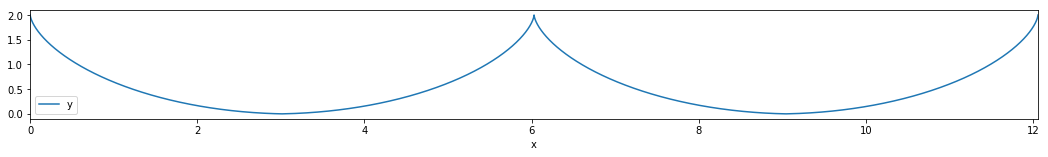

In [77]:
sys.path.insert(0, '/home/jon/projects/tapecore')
import cycloid
c = cycloid.cycloid(2)
df = pandas.DataFrame(c)
df.plot(x='x', y='y', figsize=(periods*3.01*2, 2))

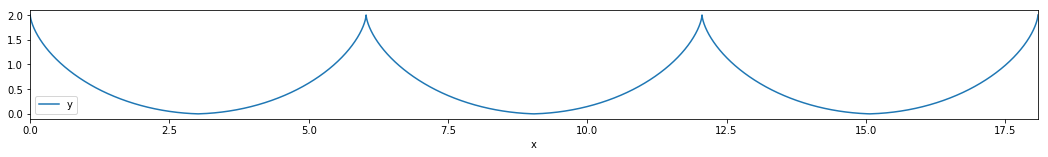

In [75]:
def cycloid_x(y, a=1.0):
    return a * math.acos(1 - (y/a)) - math.sqrt(2*a*y - y**2)

def cycloid_period(a, steps):    
    # first half
    yleft = list(i/(steps/2) for i in range(0, steps))
    xleft = list(cycloid_x(yleft[i], a) for i in range(0, steps))

    xmax = max(xleft)
    ymax = max(yleft)

    # second half
    yright = list(ymax - i/(steps/2) for i in range(0, steps))
    xright = list((xmax*2) - cycloid_x(yright[i], a) for i in range(0, steps))

    Y = yleft + yright
    x = xleft + xright

    # reflect across Y
    Y = list(ymax - y for y in Y)

    return { 'x': x, 'y': Y, 'xmax': xmax, 'ymax': ymax }

def shifted(points, shift):
    return list(p + shift for p in points)
    
def cycloid(periods, a=1.0, steps=1000):
    points = { 'x': [], 'y': [] }
    period = cycloid_period(a, steps)
    for i in range(periods):
        x = shifted(period['x'], period['xmax']*2*i)
        points['x'] += x
        points['y'] += period['y']

    return points

periods = 3
c = cycloid(periods, a=1.0, steps=1000)
df = pandas.DataFrame(c)
df.plot(x='x', y='y', figsize=(periods*3.01*2, 2))